In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import skew, kurtosis

import warnings

warnings.filterwarnings(action = 'ignore')

## 1. 데이터 입력

### 1.1 행정동, 밀도 데이터 로드 및 병합

In [2]:
tmp_df = pd.read_csv('../data/행정동_컬럼추가_최종ver.csv')
pd.set_option('display.max_columns',35)
# tmp_df
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [3]:
tmp_df.rename(columns={'인구수':'MZ_NUM'},inplace=True)
tmp_df

,GU,DONG,DONG_CODE,ACADEMY_NUM,KINDER_NUM,FIRE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,CCTV_NUM,POLICE_NUM,BIKE_NUM,CAR_SHR_NUM,SUBWAY_NUM,SAFE_DLVR_NUM,DPTM_NUM,ANI_HSPT_NUM,PHARM_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,CON_NUM,NOISE_VIBRATION_NUM,CHILD_MED_NUM,CAFE_NUM,PARK_NUM,HOSPITAL_NUM,BUS_CNT,RETAIL_NUM,COLIVING_NUM,MZ_NUM
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,18.000000,0.000000,1.0,2.000000,2.000000,3.0,56.666667,2.000000,5.666667,1.000000,0.333333,1.000000,0.0,2.000000,4.333333,1.000000,0.000000,0.0,0.0,0.000000,0.333333,0.0,4.000000,18816.000000,7.333333,39.666667,1.666667,11.666667,14.0,0.000000,0.0,3210
1,종로구,사직동,1111053000,19.000000,10.000000,0.0,2.000000,0.000000,0.0,41.666667,3.000000,11.666667,5.000000,1.333333,0.000000,0.0,1.000000,17.333333,1.000000,0.000000,0.0,18.0,3.000000,7.333333,0.0,20.000000,22848.000000,10.333333,100.666667,2.666667,74.666667,16.0,2.000000,1.0,2749
2,종로구,삼청동,1111054000,2.000000,10.000000,0.0,0.000000,1.000000,1.0,22.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.0,2.000000,14112.000000,1.000000,52.000000,1.000000,7.000000,11.0,0.000000,0.0,684
3,종로구,부암동,1111055000,24.000000,0.000000,1.0,4.000000,1.000000,1.0,41.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.0,3.000000,1.000000,0.000000,0.000000,0.0,2.0,2.000000,0.000000,0.0,8.000000,6048.000000,5.000000,30.000000,1.000000,4.000000,9.0,0.000000,0.0,2585
4,종로구,평창동,1111056000,28.000000,0.000000,0.0,0.000000,0.000000,1.0,21.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.0,5.0,5.000000,1.000000,0.0,6.000000,4032.000000,10.000000,36.000000,0.000000,14.000000,37.0,0.000000,0.0,4597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,11.0,3.333333,0.0,8130
422,강동구,성내3동,1174066000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,9.0,3.333333,0.0,7120
423,강동구,길동,1174068500,100.000000,20.000000,1.0,6.000000,1.000000,0.0,119.000000,0.000000,9.000000,10.000000,1.000000,1.000000,0.0,8.000000,35.000000,3.000000,1.000000,0.0,18.0,9.000000,2.000000,0.0,76.000000,4327.000000,10.000000,63.000000,1.000000,120.000000,28.0,8.000000,0.0,14486


In [4]:
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'ACADEMY_NUM', 'KINDER_NUM', 'FIRE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'CCTV_NUM', 'POLICE_NUM',
       'BIKE_NUM', 'CAR_SHR_NUM', 'SUBWAY_NUM', 'SAFE_DLVR_NUM', 'DPTM_NUM',
       'ANI_HSPT_NUM', 'PHARM_NUM', 'LEISURE_NUM', 'KIDS_NUM', 'SPORT_NUM',
       'GYM_NUM', 'GOLF_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'CON_NUM',
       'NOISE_VIBRATION_NUM', 'CHILD_MED_NUM', 'CAFE_NUM', 'PARK_NUM',
       'HOSPITAL_NUM', 'BUS_CNT', 'RETAIL_NUM', 'COLIVING_NUM', 'MZ_NUM'],
      dtype='object')

In [5]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


### 1.2 피처 별 가중치 부여 및 통합

### 분류 가중치 비율
- 교통 : 자전거 : 버스 : 지하철 = 0.06 : 0.93 : 1
- 치안 : 안심택배 제외 나머지 합산
- 건강 : 병원 : 약국 = 0.94 : 0.06
- 편의 :
- 교육 : 공교육(초,중,고) : 사교육(학원) = 1(0.9 : 0.07 : 0.03) : 0.7
- 육아 : 합산

In [6]:
# 행정동 데이터, 밀도 데이터 병합
tmp_df = tmp_df.set_index(['GU','DONG'])
density_df = density_df.set_index(['GU','DONG'])
temp = tmp_df.join(density_df)
tmp = temp.reset_index()

In [7]:
# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','SAFE_DLVR_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,...,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,2.000000,1.0,56.666667,11.666667,4.333333,0.0,0.000000,4.000000,...,3.0,18.000000,0.000000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,3.000000,0.0,41.666667,74.666667,17.333333,0.0,2.000000,20.000000,...,0.0,19.000000,10.000000,10.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,0.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,1.000000,0.0,22.000000,7.000000,2.000000,0.0,0.000000,2.000000,...,1.0,2.000000,10.000000,1.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,1.000000,1.0,41.000000,4.000000,1.000000,0.0,0.000000,8.000000,...,1.0,24.000000,0.000000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,1.000000,0.0,21.000000,14.000000,5.000000,0.0,0.000000,6.000000,...,1.0,28.000000,0.000000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,0.0,63.333333,16.666667,4.000000,8130,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,0.0,63.333333,16.666667,4.000000,7120,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,0.000000,1.0,119.000000,120.000000,35.000000,0.0,8.000000,76.000000,...,0.0,100.000000,20.000000,10.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,1.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,1.000000,0.0,32.500000,14.500000,10.000000,0.0,0.000000,17.000000,...,1.0,38.000000,0.000000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,0.000000,0.0,4.0,3.000000,2.000000,1.500000


In [8]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.377934,53.603286,42.293427,12.169014,0.063380,2.995305,27.239437,37.985915,2.838028,1.007042,0.809859,57.737089,21.572770,14.323944,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,0.622066,1.194836,0.166667,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.568790,41.087587,35.024099,7.266001,0.207678,2.904085,19.771517,37.562957,1.465365,0.775321,0.877893,56.280168,18.688217,14.060665,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,0.503566,1.606980,0.567719,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,4.333333,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,25.946429,23.500000,8.000000,0.000000,1.333333,17.714286,19.541667,2.000000,0.500000,0.250000,27.090909,10.000000,4.381250,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,0.000000,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.200000,41.375000,34.500000,11.000000,0.000000,2.400000,22.500000,27.363636,2.400000,1.000000,0.666667,41.166667,20.000000,10.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.666667,0.833333,0.000000,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,0.500000,65.731250,48.000000,14.000000,0.000000,4.000000,29.333333,39.250000,3.600000,1.400000,1.000000,70.000000,30.000000,18.000000,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.000000,1.750000,0.000000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,4.000000,251.000000,255.000000,50.000000,1.500000,28.000000,170.000000,274.000000,10.000000,6.000000,6.500000,480.250000,170.000000,101.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,3.500000,15.000000,5.000000,60.000000,32.500000,24.000000,12.000000


In [9]:
# 불필요 컬럼 제거
tmp = tmp.drop(['SPORT_NUM'],axis=1)

In [10]:
tmp.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'SUBWAY_NUM',
       'BUS_CNT', 'BIKE_NUM', 'POLICE_NUM', 'FIRE_NUM', 'CCTV_NUM',
       'HOSPITAL_NUM', 'PHARM_NUM', 'DPTM_NUM', 'RETAIL_NUM', 'CON_NUM',
       'CAFE_NUM', 'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'ACADEMY_NUM',
       'KINDER_NUM', 'CHILD_MED_NUM', 'MZ_NUM', 'COLIVING_NUM', 'KIDS_NUM',
       'STARBUCKS_NUM', 'MC_NUM', 'NOISE_VIBRATION_NUM', 'SAFE_DLVR_NUM',
       'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [11]:
# 피처 통합 함수
def assembling_features(df, weight, name): # 피처들로 구성된 데이터프레임, 피처별 가중치, 새로 생성할 피처의 이름
    columns = df.columns
    values = df[columns].values.tolist()
    sums = []
    
    for i in range(len(df)):
        sigma = 0
        for k in range(len(values[i])):
            sigma += values[i][k] * weight[k]
        sums.append(sigma)
    sum_df = pd.DataFrame(sums,columns=[name])
    return sum_df

In [12]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','FIRE_NUM','CCTV_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]
# 각 묶어지는 컬럼 별 가중치 list
weight_list = [[1,0.93,0.06],[1,1,1],[0.94,0.06],[0.04,0.27,0.44,0.25],[0.9,0.07,0.03,0.7],[1,1]]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVENIENCE','EDUCATION','PARANTING']

In [13]:
# 큰 카테고리로 묶는 함수
def assembling(df, sum_list, weight_list, name_list): 
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        tmp_df = df[sum_list[j]]
        name = name_list[j]
        w = weight_list[j]
        sum_df = assembling_features(tmp_df,w,name)

        tmp_df[name_list[j]] = sum_df.values
        tmp_df = tmp_df.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(tmp_df)
    del(df_tmp[0])
    return df_tmp

In [14]:
# 컬럼 끼리 더한 데이터
asmb_df = assembling(tmp,sum_list,weight_list,name_list)
asmb_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING
0,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333
1,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333
2,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000
3,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000
4,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000
...,...,...,...,...,...,...
421,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667
422,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667
423,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000
424,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000


In [15]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df, asmb_df, sum_list, name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE','POP','AREA','DENSITY'] + name_list +['MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']
    df = df[column_list]
    return df

In [16]:
tmp_df = data_frame_redirect(tmp, asmb_df, sum_list, name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'TRANSPORT',
       'SECURITY', 'HEALTH', 'CONVENIENCE', 'EDUCATION', 'PARANTING', 'MZ_NUM',
       'COLIVING_NUM', 'KIDS_NUM', 'STARBUCKS_NUM', 'MC_NUM',
       'NOISE_VIBRATION_NUM', 'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM',
       'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [17]:
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,1.000000,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667,8130,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667,7120,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,3.000000,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,4.0,3.000000,2.000000,1.500000


In [18]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,15.812629,54.546948,40.485962,22.293099,43.064977,35.896714,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,1.194836,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.637535,41.269881,33.313301,17.783109,39.861247,25.925220,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,1.606980,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,2.070000,4.333333,1.000000,1.431667,0.700000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.540000,26.589286,22.480000,13.440833,20.842727,16.750000,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.497000,42.750000,33.070000,17.945000,31.662500,30.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.833333,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,19.942500,67.075000,46.221000,23.131500,52.250000,48.187500,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.750000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,73.811818,252.500000,242.700000,135.775000,342.280000,207.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,15.000000,60.000000,32.500000,24.000000,12.000000


### 1.3 면적 당 수치 계산

In [19]:
area = tmp_df['AREA']

In [20]:
columns = tmp_df.columns[6:]

In [21]:
for i in range(len(area)):
    for column in columns:
        tmp_df[column][i] = tmp_df[column][i] / area[i]
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,7321.400778,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,18575.609756,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,9471.140940,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,2664.317181,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,454.565953,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,2152.736318,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,2031.455399,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,23.663594,34.778802,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1994.009217,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,2351.630435,0.000000,4.347826,3.260870,2.173913,1.630435


In [22]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,14.899219,56.413573,40.203343,21.706931,42.454016,36.996223,7109.301320,0.166431,0.498434,1.159477,0.188286,2254.690189,1.223275,7.136976,3.344890,4.052260,2.152990
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.722790,50.615331,28.324127,14.839065,42.415614,28.662723,3922.924848,0.582447,0.632681,1.733016,0.305553,3915.731918,1.647054,5.813202,3.367516,2.819812,1.543945
min,1.111052e+09,144.000000,0.230000,157.000000,1.402529,1.104101,0.357143,1.037855,1.006711,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,22.375445,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.331860,23.515357,19.444727,11.931636,19.589909,15.043297,4088.947368,0.000000,0.000000,0.238595,0.000000,425.640244,0.000000,3.012962,1.204481,1.949320,1.010498
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.183811,43.993671,35.314432,19.422745,32.325255,31.173590,7053.872138,0.000000,0.327602,0.648668,0.000000,943.124462,0.730461,5.902233,2.443618,3.571429,1.900506
75%,1.161306e+09,27908.250000,1.487500,31708.500000,18.691749,73.260354,52.296139,27.678636,52.244898,50.301671,9397.635294,0.000000,0.745713,1.417603,0.316456,2071.379767,1.675408,9.523810,4.289551,5.570074,2.935049
max,1.174070e+09,56012.000000,12.680000,55657.000000,136.688552,522.500000,211.043478,118.065217,390.982877,167.705167,27574.074074,5.405405,4.000000,18.686869,3.030303,34560.000000,12.121212,39.130435,28.260870,16.956522,9.090909


### 1.4 왜도/첨도 측정 : 일부 특성들을 범주화

#### 1.4.1 왜도/첨도 측정

In [23]:
columns = tmp_df.columns[6:]
skews = []
kurtosises = []
for column in columns:
    # 왜도 : 절댓값 3을 넘지 않아야 함
    skews.append(skew(tmp_df[column]))

    # 첨도 : 절댓값 8~10을 넘지 않아야 함
    kurtosises.append(kurtosis(tmp_df[column], fisher=True))
res = [skews,kurtosises]
standard_df = pd.DataFrame(data=res, index=['왜도','첨도'],columns=columns)

In [24]:
standard_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
왜도,5.072204,3.132583,1.547339,2.001621,4.00260,1.361778,0.685738,4.792325,1.895467,4.566057,3.144228,3.912226,2.655983,1.742896,2.604953,1.049841,1.033603
첨도,56.811500,19.030154,4.134766,7.570355,23.55307,2.534743,1.285944,28.221618,4.395937,32.014755,18.791080,19.032090,9.877211,4.295465,10.645659,1.592107,1.487151


In [25]:
over = []
for column in standard_df.columns:
    if((standard_df[column][0] > 3) and (standard_df[column][1] > 10)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [26]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,COLIVING_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM
1,5.072204,3.132583,4.0026,4.792325,4.566057,3.144228,3.912226
2,56.8115,19.030154,23.55307,28.221618,32.014755,18.79108,19.03209


In [27]:
over_std.columns

Index(['TRANSPORT', 'SECURITY', 'EDUCATION', 'COLIVING_NUM', 'STARBUCKS_NUM',
       'MC_NUM', 'NOISE_VIBRATION_NUM'],
      dtype='object', name=0)

#### 1.4.2 범주화 작업
- 소음

array([[<AxesSubplot:title={'center':'DONG_CODE'}>,
        <AxesSubplot:title={'center':'POP'}>,
        <AxesSubplot:title={'center':'AREA'}>,
        <AxesSubplot:title={'center':'DENSITY'}>,
        <AxesSubplot:title={'center':'TRANSPORT'}>],
       [<AxesSubplot:title={'center':'SECURITY'}>,
        <AxesSubplot:title={'center':'HEALTH'}>,
        <AxesSubplot:title={'center':'CONVENIENCE'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'PARANTING'}>],
       [<AxesSubplot:title={'center':'MZ_NUM'}>,
        <AxesSubplot:title={'center':'COLIVING_NUM'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>,
        <AxesSubplot:title={'center':'MC_NUM'}>],
       [<AxesSubplot:title={'center':'NOISE_VIBRATION_NUM'}>,
        <AxesSubplot:title={'center':'LEISURE_NUM'}>,
        <AxesSubplot:title={'center':'GYM_NUM'}>,
        <AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSu

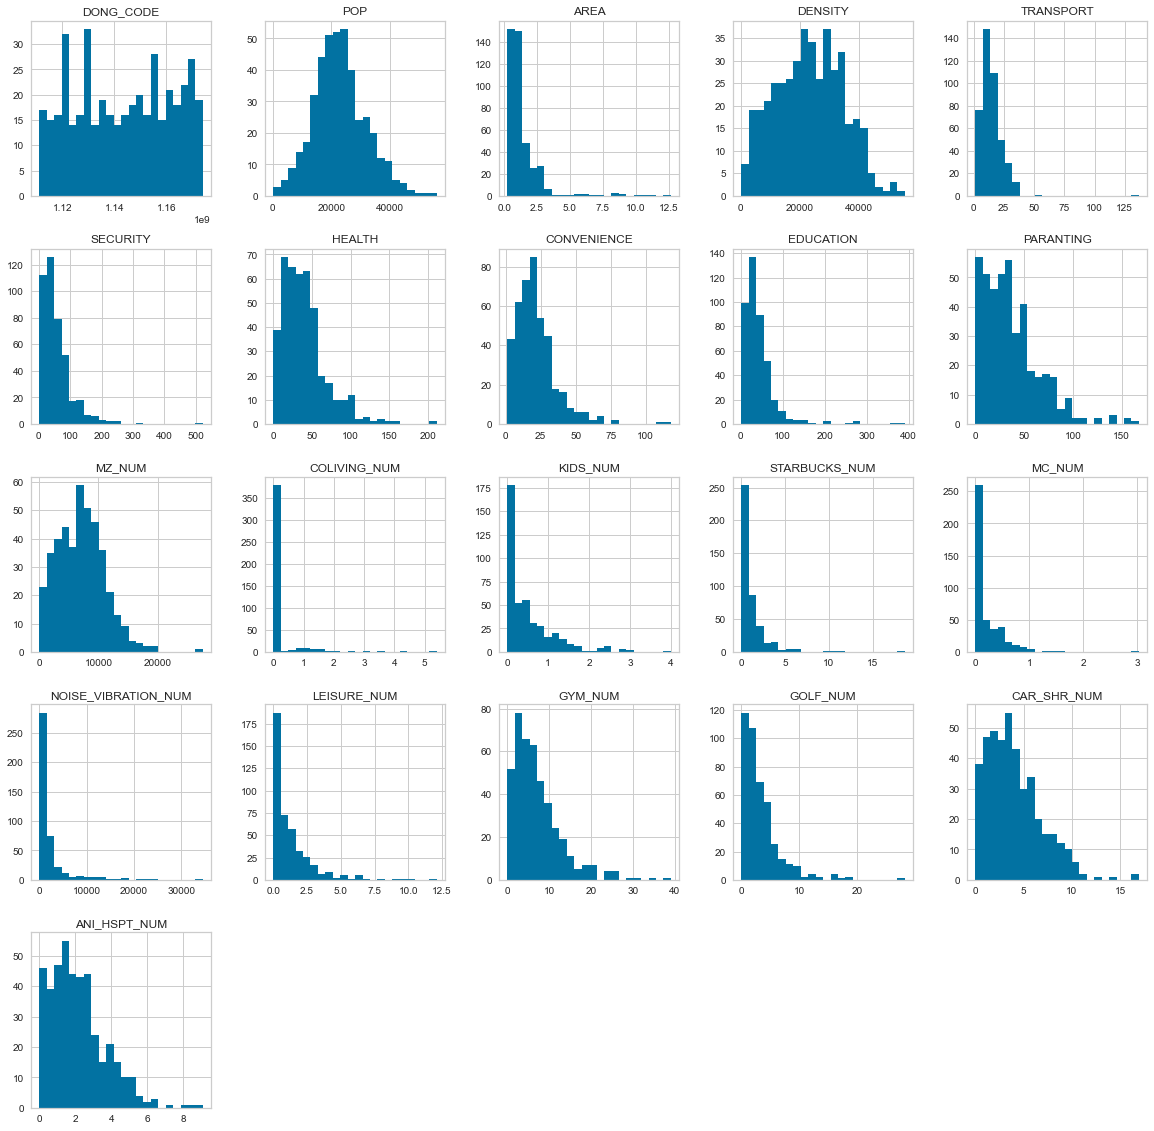

In [28]:
tmp_df.hist(figsize = (20, 20), bins = 22, legend = False)

In [29]:
origin_df = tmp_df.copy()

**소음**

In [30]:
noise = tmp_df['NOISE_VIBRATION_NUM']
noise

0       7321.400778
1      18575.609756
2       9471.140940
3       2664.317181
4        454.565953
           ...     
421     2152.736318
422     2031.455399
423     1994.009217
424     2351.630435
425     2207.653061
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [31]:
for i in range(len(noise)):
    if (noise[i] < 500):
        noise[i] = 4
    elif (noise[i] >= 500 and noise[i] < 1000):
        noise[i] = 3
    elif (noise[i] >= 1000 and noise[i] < 1500):
        noise[i] = 2
    else:
        noise[i] = 1
noise

0      1.0
1      1.0
2      1.0
3      1.0
4      4.0
      ... 
421    1.0
422    1.0
423    1.0
424    1.0
425    1.0
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [32]:
noise.value_counts()

1.0    147
4.0    124
3.0     99
2.0     56
Name: NOISE_VIBRATION_NUM, dtype: int64

In [33]:
tmp_df['NOISE_VIBRATION_NUM'] = noise
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,1.0,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,23.663594,34.778802,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1.0,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435


#### 1.4.3 최댓값 제한
- 교통
- 보안
- 교육
- 스타벅스
- 맥도날드

**교통**

<AxesSubplot:>

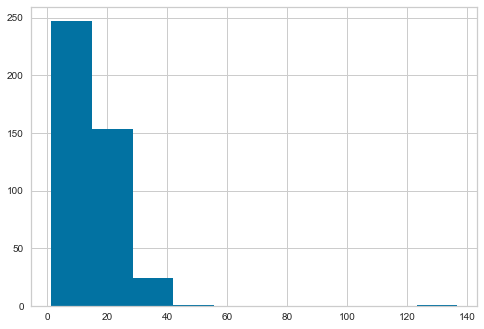

In [34]:
tmp_df['TRANSPORT'].hist()

In [35]:
tmp_df['TRANSPORT'].describe()

count    426.000000
mean      14.899219
std        9.722790
min        1.402529
25%        9.331860
50%       13.183811
75%       18.691749
max      136.688552
Name: TRANSPORT, dtype: float64

In [36]:
t = tmp_df['TRANSPORT'].quantile(0.95)
t

29.322401908801698

In [37]:
tmp_df['TRANSPORT'] = np.where(tmp_df['TRANSPORT'] > t, t, tmp_df['TRANSPORT'])

<AxesSubplot:>

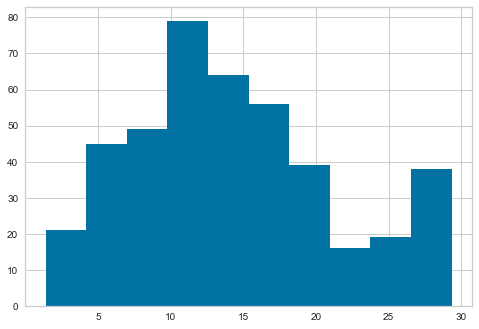

In [38]:
tmp_df['TRANSPORT'].hist()

In [39]:
tmp_df['TRANSPORT']

0       5.328145
1      13.750678
2       7.818792
3       3.819383
4       3.926719
         ...    
421    16.303483
422    12.765258
423    12.709677
424     4.945652
425    19.826531
Name: TRANSPORT, Length: 426, dtype: float64

In [40]:
tmp_df['TRANSPORT'] = np.log1p(tmp_df['TRANSPORT'])

<AxesSubplot:>

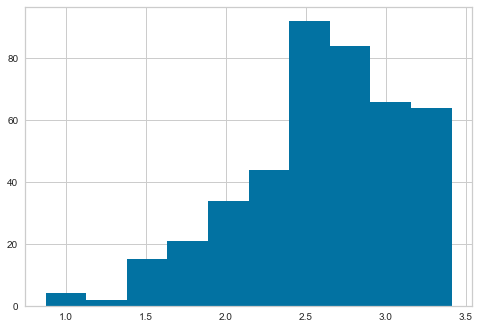

In [41]:
tmp_df['TRANSPORT'].hist()

**보안**

<AxesSubplot:>

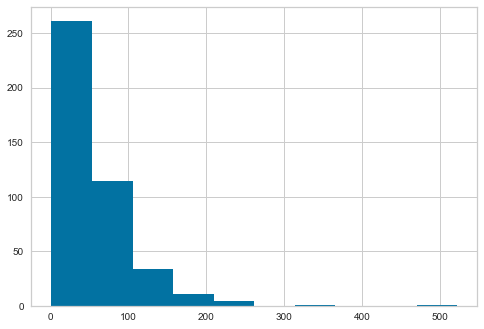

In [42]:
tmp_df['SECURITY'].hist()

In [43]:
tmp_df['SECURITY'].describe()

count    426.000000
mean      56.413573
std       50.615331
min        1.104101
25%       23.515357
50%       43.993671
75%       73.260354
max      522.500000
Name: SECURITY, dtype: float64

In [44]:
s = tmp_df['SECURITY'].quantile(0.95)
s

143.22741982936157

In [45]:
tmp_df['SECURITY'] = np.where(tmp_df['SECURITY'] > s, s, tmp_df['SECURITY'])

<AxesSubplot:>

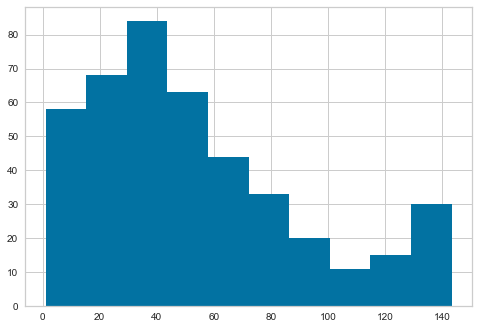

In [46]:
tmp_df['SECURITY'].hist()

In [47]:
tmp_df['SECURITY'] = np.log1p(tmp_df['SECURITY'])

<AxesSubplot:>

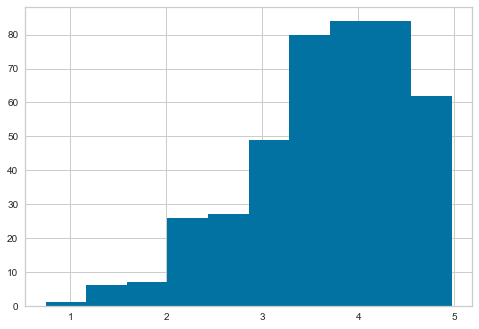

In [48]:
tmp_df['SECURITY'].hist()

**건강**

<AxesSubplot:>

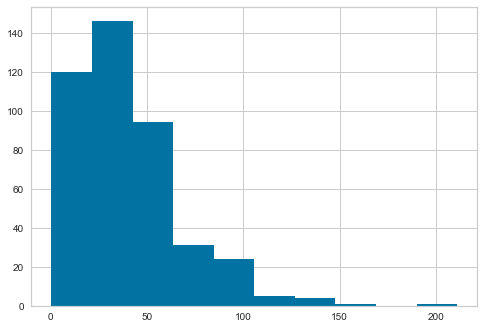

In [49]:
tmp_df['HEALTH'].hist()

In [50]:
h = tmp_df['HEALTH'].quantile(0.95)
h

96.691258111031

In [51]:
tmp_df['HEALTH'] = np.where(tmp_df['HEALTH'] > h, h, tmp_df['HEALTH'])

<AxesSubplot:>

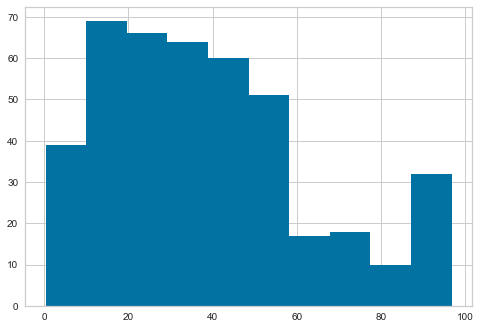

In [52]:
tmp_df['HEALTH'].hist()

In [53]:
tmp_df['HEALTH'] = np.log1p(tmp_df['HEALTH'])

<AxesSubplot:>

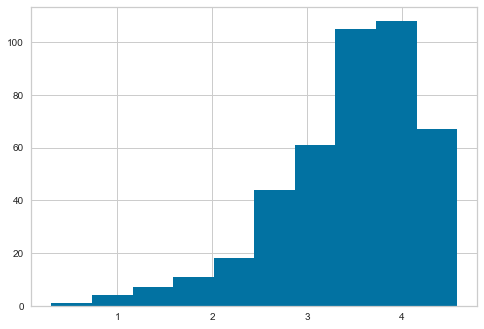

In [54]:
tmp_df['HEALTH'].hist()

**교육**

<AxesSubplot:>

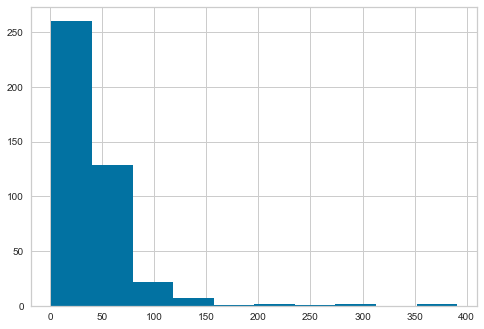

In [55]:
tmp_df['EDUCATION'].hist()

In [56]:
e = tmp_df['EDUCATION'].quantile(0.95)
e

105.6954219807904

In [57]:
tmp_df['EDUCATION'] = np.where(tmp_df['EDUCATION'] > e, e, tmp_df['EDUCATION'])

<AxesSubplot:>

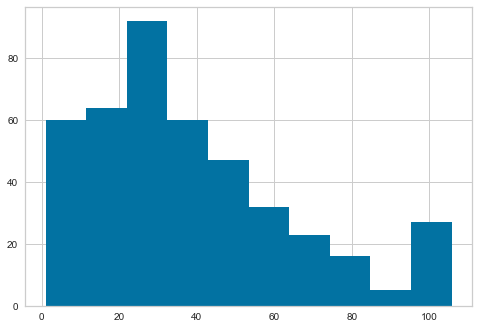

In [58]:
tmp_df['EDUCATION'].hist()

In [59]:
tmp_df['EDUCATION'] = np.log1p(tmp_df['EDUCATION'])

<AxesSubplot:>

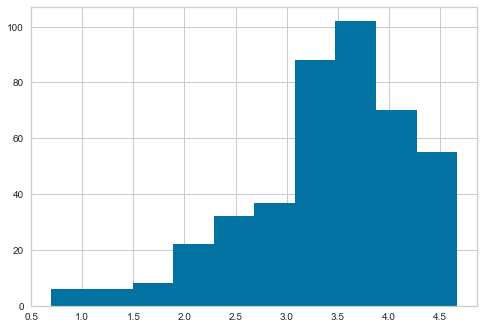

In [60]:
tmp_df['EDUCATION'].hist()

**MZ 세대원 수**

<AxesSubplot:>

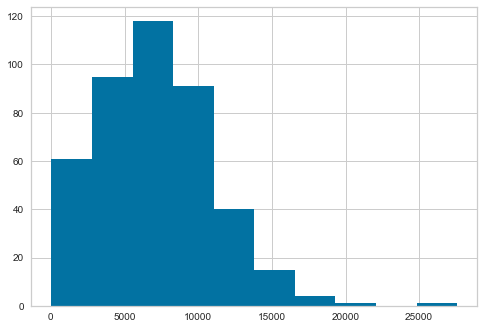

In [72]:
tmp_df['MZ_NUM'].hist()

In [74]:
m = tmp_df['MZ_NUM'].quantile(0.95)
m

13722.931785195935

In [75]:
tmp_df['MZ_NUM'] = np.where(tmp_df['MZ_NUM'] > m, m, tmp_df['MZ_NUM'])

<AxesSubplot:>

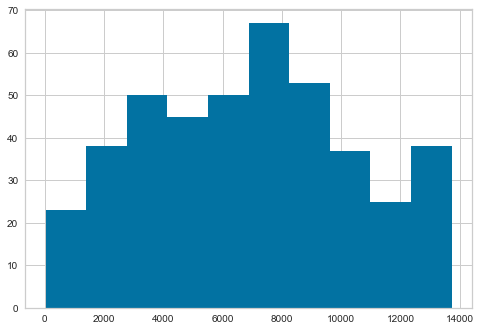

In [76]:
tmp_df['MZ_NUM'].hist()

일부 특성 로그변환

In [68]:
tmp_df['CONVENIENCE'] = np.log1p(tmp_df['CONVENIENCE'])

In [69]:
tmp_df['PARANTING'] = np.log1p(tmp_df['PARANTING'])

In [70]:
tmp_df['GOLF_NUM'] = np.log1p(tmp_df['GOLF_NUM'])

In [71]:
tmp_df['STARBUCKS_NUM'] = np.log1p(tmp_df['STARBUCKS_NUM'])

**RobustScaling**

In [77]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,1.680521,1.712617,1.901003,1.348966,1249.027237,0.000000,0.000000,0.121954,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,4.075975,3.369163,2.585990,2.863980,2234.959350,0.813008,0.000000,1.940475,0.000000,1.0,0.813008,14.634146,1.235188,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,1.704138,2.333641,0.696497,2.126152,459.060403,0.000000,0.000000,0.513507,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,0.986868,1.767232,2.305664,1.163976,1138.766520,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.631834,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,0.923256,0.838238,1.167229,0.754899,518.263811,0.000000,0.000000,0.106825,0.000000,4.0,0.000000,0.563698,0.447053,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,4.447090,3.818204,4.234034,3.460905,12134.328358,0.000000,0.995025,1.095290,0.000000,1.0,2.487562,14.925373,2.075079,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,2.622148,4.332277,4.389801,3.761528,4.176912,3.404790,10028.169014,0.000000,0.938967,1.057073,0.000000,1.0,2.347418,14.084507,2.024559,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,2.618102,4.030686,3.988045,3.205328,3.577356,2.696307,6675.576037,0.000000,0.460829,0.653189,0.000000,1.0,1.382488,8.294931,1.638504,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,2.801382,2.630872,3.466245,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,1.449473,2.173913,1.630435


In [78]:
col = df.columns[6:]
data = df[col]

In [79]:
scaler = RobustScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled

array([[-1.25137342e+00, -5.58933328e-01, -1.99521548e+00, ...,
        -1.41279326e+00, -8.78911985e-01, -5.83146567e-01],
       [ 6.07593592e-02, -1.68851561e-01,  5.04894589e-01, ...,
        -1.52399603e-03,  1.36328557e-01, -5.65065462e-01],
       [-7.36807703e-01, -9.08602792e-01, -1.97056702e+00, ...,
        -1.41279326e+00, -8.01017731e-01, -9.87505816e-01],
       ...,
       [-5.27148102e-02,  2.02254048e-01,  4.13123334e-01, ...,
         4.59287180e-01,  2.86367576e-01,  9.28076249e-01],
       [-1.34804038e+00, -1.66468631e-01, -8.25384361e-01, ...,
         2.43308773e-01, -3.85973689e-01, -1.40329237e-01],
       [ 5.95575683e-01, -2.21900826e-01, -8.87198270e-01, ...,
         1.88479032e-01, -4.22733088e-01, -1.92197191e-01]])

In [80]:
df[col] = df_scaled
data = df[col]

In [159]:
data

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,-1.251373,-0.558933,-1.995215,-0.944897,-0.815577,-0.803218,-1.093461,0.000000,-0.439314,-0.440172,0.000000,-0.666667,-0.203745,-0.906523,-0.792079,-0.878912,-0.583147
1,0.060759,-0.168852,0.504895,0.548133,-0.613959,-0.415289,-0.907741,0.813008,-0.439314,4.506663,0.000000,-0.666667,0.049270,1.341133,-0.001489,0.136329,-0.565065
2,-0.736808,-0.908603,-1.970567,-0.641856,-0.959074,-0.674763,-1.242268,0.000000,-0.439314,0.019061,0.000000,-0.666667,-0.435990,-0.597282,-0.792079,-0.801018,-0.987506
3,-1.673661,-0.734128,-2.719174,-0.925136,-0.713349,-0.821676,-1.114231,0.000000,-0.439314,-0.550181,0.000000,-0.666667,-0.435990,-0.771202,-0.506491,-0.378039,-0.300808
4,-1.639508,-2.309248,-2.785565,-1.150089,-0.922131,-0.852172,-1.231116,0.000000,-0.439314,-0.454558,0.000000,0.333333,-0.435990,-0.819945,-0.609361,-0.986377,-0.987506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.308243,0.526017,0.892224,1.593932,1.092322,-0.009298,0.957008,0.000000,0.895012,1.137721,0.000000,-0.666667,1.048760,1.385863,1.465626,1.761738,1.080560
422,-0.046442,0.474366,0.832433,1.434644,0.975014,-0.058585,0.560270,0.000000,0.819839,1.042628,0.000000,-0.666667,0.965113,1.256714,1.338431,1.606915,0.964050
423,-0.052715,0.202254,0.413123,0.269312,0.075135,-0.492045,-0.071260,0.000000,0.178657,0.231543,0.000000,-0.666667,0.389176,0.367494,0.552288,0.286368,0.928076
424,-1.348040,-0.166469,-0.825384,-0.415119,-0.040084,-0.884147,-1.321984,0.000000,-0.439314,-0.550181,1.717391,-0.666667,-0.435990,-0.238741,0.264906,-0.385974,-0.140329


## 2. K-means 군집화

### 2.1 1차 k-means clustering

#### 2.1.1 Elbow 관측

In [81]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

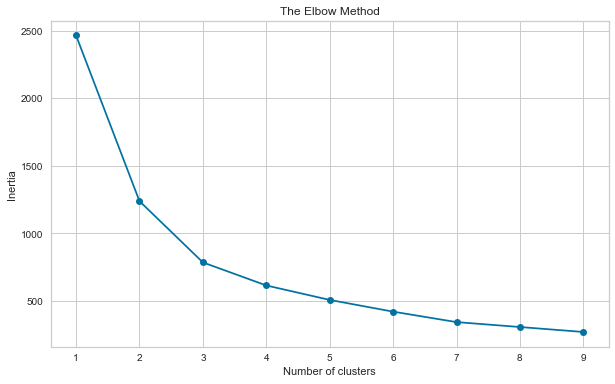

In [82]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### 2.1.2 k-means, n_cluster = 3

In [83]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [84]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
km_cluster,,,,,,,,,,,,,,,,,,,,,,,
0,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
1,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
2,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111


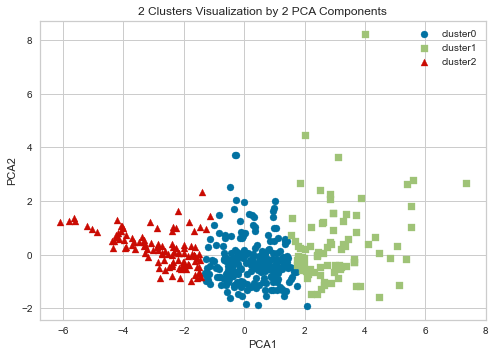

In [85]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [86]:
df[df['pca_y'] > 8] # MZ 세대가 적고, 코리빙, 스타벅스가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,4.581812,4.723985,2.770377,3.816491,1235.353535,3.030303,0.0,2.979952,3.030303,1.0,1.010101,18.181818,1.393842,7.070707,0.0,1,3.986196,8.20973


In [89]:
df[df['pca_x'] > 6] # 편의 시설이 많고, 스타벅스가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
369,강남구,역삼2동,1168065000,36378,1.15,31633,2.738875,4.971391,4.581812,4.779671,4.669978,3.501764,8150.434783,0.0,0.869565,2.43666,0.869565,1.0,4.782609,39.130435,3.376251,16.521739,6.521739,1,7.335299,2.673881


In [91]:
df[df['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
count,2.310000e+02,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.0,231.000000,231.000000
mean,1.141939e+09,22935.411255,0.970476,25719.826840,2.741765,3.902973,3.620842,3.046335,3.566794,3.548516,7815.334513,0.147163,0.444793,0.571471,0.179418,2.484848,1.122404,6.486077,1.246433,3.990653,2.113734,0.0,0.226454,-0.262490
std,1.841382e+07,8841.032199,0.450926,8833.014897,0.392715,0.616947,0.355433,0.328914,0.542949,0.647378,2886.566582,0.473634,0.488619,0.453371,0.272302,1.229523,1.191248,3.010685,0.543692,1.966296,1.090815,0.0,0.785937,0.855735
min,1.111053e+09,1914.000000,0.230000,1980.000000,1.418508,1.656784,2.756461,2.253239,0.773190,0.747214,402.970297,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.295549,-1.919292
25%,1.126060e+09,16637.500000,0.655000,20376.000000,2.474670,3.558146,3.377440,2.799057,3.303675,3.267436,5907.703669,0.000000,0.000000,0.315224,0.000000,1.000000,0.000000,4.236093,0.978755,2.731171,1.372549,0.0,-0.405633,-0.809515
50%,1.141064e+09,22240.000000,0.900000,25420.000000,2.733379,3.921228,3.668677,3.049931,3.613752,3.606403,7902.898551,0.000000,0.383142,0.506420,0.000000,3.000000,0.862069,6.250000,1.280659,3.678161,2.061856,0.0,0.228012,-0.403816
75%,1.159052e+09,28901.500000,1.160000,32487.000000,3.015424,4.318786,3.880091,3.273023,3.878366,3.939557,9473.697917,0.000000,0.641458,0.761598,0.305836,4.000000,1.653005,8.490760,1.620751,5.198147,2.733337,0.0,0.889132,0.032514
max,1.174068e+09,52770.000000,2.940000,47116.000000,3.411887,4.971391,4.581812,4.340771,4.669978,4.970766,13722.931785,3.157895,2.857143,2.519998,1.449275,4.000000,6.567164,20.000000,2.546684,10.714286,5.357143,0.0,2.085010,3.707795


In [88]:
df[df['km_cluster'] == 1].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
count,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.000000,84.000000
mean,1.148364e+09,22804.226190,0.829286,31237.107143,2.853040,4.247669,4.285070,3.660771,4.110494,3.884226,9597.718094,0.354543,1.115938,1.151327,0.378530,2.059524,2.735930,15.288233,1.959999,7.515281,3.995213,1.0,3.042858,0.409591
std,1.924221e+07,7957.062076,0.458635,10516.028876,0.427330,0.607508,0.278819,0.356748,0.593563,0.726759,3175.314292,0.937936,0.866544,0.479944,0.437291,1.133830,2.495258,6.710750,0.545156,2.785125,1.643671,0.0,1.136537,1.486224
min,1.111070e+09,3742.000000,0.230000,3780.000000,1.563501,2.353640,3.468460,2.993807,1.482832,1.963252,1235.353535,0.000000,0.000000,0.265399,0.000000,1.000000,0.000000,1.351351,0.676887,1.287554,0.000000,1.0,1.546897,-1.582400
25%,1.133936e+09,17968.250000,0.557500,24860.000000,2.646089,3.837788,4.063861,3.409930,3.923076,3.539182,7549.681467,0.000000,0.423316,0.816186,0.000000,1.000000,1.058201,10.907046,1.585437,5.570074,2.967540,1.0,2.176872,-0.472831
50%,1.150056e+09,22368.500000,0.685000,31885.000000,2.858662,4.354182,4.321996,3.663138,4.233994,4.055834,10022.621092,0.000000,1.047149,1.135603,0.346671,2.000000,2.178277,13.977348,1.958590,7.382883,4.016129,1.0,2.852670,0.058410
75%,1.168051e+09,26665.500000,0.995000,38355.250000,3.223545,4.778328,4.580221,3.865796,4.541897,4.382635,12179.960317,0.000000,1.537028,1.383704,0.538068,3.000000,3.637500,18.502665,2.314581,8.975796,4.781106,1.0,3.617625,1.031373
max,1.174066e+09,43181.000000,2.520000,55657.000000,3.411887,4.971391,4.581812,4.779671,4.669978,5.128153,13722.931785,5.405405,4.000000,2.979952,3.030303,4.000000,12.121212,39.130435,3.376251,16.956522,9.090909,1.0,7.335299,8.209730


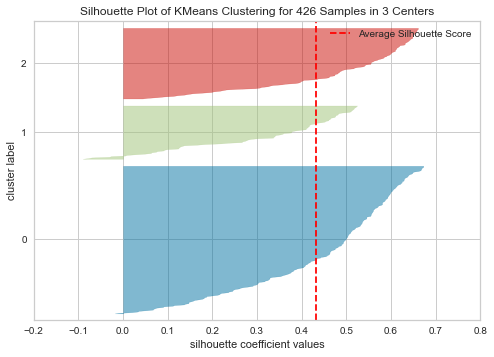

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [92]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()

In [93]:
score = silhouette_score(data,df['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.207


#### 2.1.3 각 군집 별 데이터 확인

**km_cluster == 0**

In [94]:
df_cluster_0 = df[df['km_cluster'] == 0][col]

In [95]:
df_cluster_0.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,2.741765,3.902973,3.620842,3.046335,3.566794,3.548516,7815.334513,0.147163,0.444793,0.571471,0.179418,2.484848,1.122404,6.486077,1.246433,3.990653,2.113734
std,0.392715,0.616947,0.355433,0.328914,0.542949,0.647378,2886.566582,0.473634,0.488619,0.453371,0.272302,1.229523,1.191248,3.010685,0.543692,1.966296,1.090815
min,1.418508,1.656784,2.756461,2.253239,0.773190,0.747214,402.970297,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.474670,3.558146,3.377440,2.799057,3.303675,3.267436,5907.703669,0.000000,0.000000,0.315224,0.000000,1.000000,0.000000,4.236093,0.978755,2.731171,1.372549
50%,2.733379,3.921228,3.668677,3.049931,3.613752,3.606403,7902.898551,0.000000,0.383142,0.506420,0.000000,3.000000,0.862069,6.250000,1.280659,3.678161,2.061856
75%,3.015424,4.318786,3.880091,3.273023,3.878366,3.939557,9473.697917,0.000000,0.641458,0.761598,0.305836,4.000000,1.653005,8.490760,1.620751,5.198147,2.733337
max,3.411887,4.971391,4.581812,4.340771,4.669978,4.970766,13722.931785,3.157895,2.857143,2.519998,1.449275,4.000000,6.567164,20.000000,2.546684,10.714286,5.357143


**km_cluster == 1**

In [96]:
df_cluster_1 = df[df['km_cluster'] == 1][col]

In [97]:
df_cluster_1.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2.853040,4.247669,4.285070,3.660771,4.110494,3.884226,9597.718094,0.354543,1.115938,1.151327,0.378530,2.059524,2.735930,15.288233,1.959999,7.515281,3.995213
std,0.427330,0.607508,0.278819,0.356748,0.593563,0.726759,3175.314292,0.937936,0.866544,0.479944,0.437291,1.133830,2.495258,6.710750,0.545156,2.785125,1.643671
min,1.563501,2.353640,3.468460,2.993807,1.482832,1.963252,1235.353535,0.000000,0.000000,0.265399,0.000000,1.000000,0.000000,1.351351,0.676887,1.287554,0.000000
25%,2.646089,3.837788,4.063861,3.409930,3.923076,3.539182,7549.681467,0.000000,0.423316,0.816186,0.000000,1.000000,1.058201,10.907046,1.585437,5.570074,2.967540
50%,2.858662,4.354182,4.321996,3.663138,4.233994,4.055834,10022.621092,0.000000,1.047149,1.135603,0.346671,2.000000,2.178277,13.977348,1.958590,7.382883,4.016129
75%,3.223545,4.778328,4.580221,3.865796,4.541897,4.382635,12179.960317,0.000000,1.537028,1.383704,0.538068,3.000000,3.637500,18.502665,2.314581,8.975796,4.781106
max,3.411887,4.971391,4.581812,4.779671,4.669978,5.128153,13722.931785,5.405405,4.000000,2.979952,3.030303,4.000000,12.121212,39.130435,3.376251,16.956522,9.090909


**km_cluster == 2**

In [98]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [99]:
df_cluster_2.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,2.176160,2.887112,2.479330,2.103763,2.596944,2.367993,3251.216424,0.064175,0.142766,0.253785,0.062772,2.747748,0.288484,2.323030,0.685243,1.559802,0.840570
std,0.528538,0.767777,0.640583,0.507590,0.720792,0.807241,1947.678490,0.373522,0.236417,0.289332,0.133024,1.246584,0.406942,1.618508,0.414024,1.161590,0.592115
min,0.876522,0.743888,0.305382,0.711898,0.696497,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.777541,2.353452,2.172429,1.793610,2.099554,1.853356,1869.095421,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.097512,0.391201,0.717049,0.375945
50%,2.176885,2.909463,2.612278,2.109000,2.672514,2.420938,2992.537313,0.000000,0.000000,0.188131,0.000000,3.000000,0.131435,2.013423,0.669050,1.309524,0.761421
75%,2.556221,3.456083,2.906739,2.412438,3.182581,2.964907,4323.993551,0.000000,0.223544,0.333027,0.067660,4.000000,0.425646,3.194444,0.991675,2.170967,1.187887
max,3.411887,4.495316,3.794365,3.534071,4.047042,4.321290,12045.833333,3.508772,1.379310,1.548350,0.751880,4.000000,1.851852,8.637874,1.834685,5.633803,2.816901


### 2.2 2차 k-means_clustering

#### 2.2.1 km_cluster == 0

- Elbow 관측

In [100]:
df_0 = df[df['km_cluster'] == 0][tmp_df.columns]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,4.075975,3.369163,2.585990,2.863980,2234.959350,0.813008,0.000000,1.940475,0.000000,1.0,0.813008,14.634146,1.235188,4.065041,0.813008
6,종로구,교남동,1111058000,10203,0.35,29151,3.411887,3.386809,4.054018,3.174476,3.727413,4.643016,8122.857143,0.000000,2.857143,2.519998,0.000000,1.0,0.000000,5.714286,0.000000,0.000000,2.857143
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,3.116128,3.623111,4.165884,3.669563,3.489390,3.431697,1008.510638,1.276596,0.425532,1.898183,0.425532,1.0,1.702128,4.255319,1.140285,7.659574,0.000000
9,종로구,종로5.6가동,1111063000,5476,0.60,9127,3.099341,4.214594,4.581812,3.385520,2.498700,4.492375,3541.666667,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
10,종로구,이화동,1111064000,7705,0.78,9878,2.748257,3.880241,2.862933,3.195528,2.358675,2.002865,4100.000000,0.000000,0.000000,1.812902,1.282051,1.0,0.000000,3.846154,0.825075,8.974359,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,강동구,명일2동,1174054000,17568,0.97,18111,2.634629,3.447202,4.277239,3.005989,4.669978,2.769362,4338.144330,0.000000,1.546392,0.934677,0.000000,1.0,1.546392,8.762887,1.972074,5.670103,2.061856
414,강동구,암사1동,1174057000,34782,1.02,34100,2.178902,3.809273,3.369997,2.817715,3.868815,2.667137,9568.627451,0.000000,1.307190,0.282768,0.000000,2.0,0.326797,5.228758,1.284920,1.307190,1.633987
415,강동구,암사2동,1174058000,15252,1.18,12925,2.316332,3.667032,3.229665,2.681331,3.726374,2.532261,3988.135593,0.000000,1.129944,0.248800,0.000000,2.0,0.282486,4.519774,1.181693,1.129944,1.412429
418,강동구,천호2동,1174061000,33753,1.57,21499,2.314614,4.058721,3.712743,3.050470,3.027289,2.912881,7136.942675,0.000000,1.273885,0.614784,0.212314,3.0,2.760085,2.972399,0.910755,3.609342,0.849257


In [101]:
col_0 = df_0.columns[6:]
data_0 = df_0[col_0].values

In [102]:
pca_transformed_0 = pca.fit_transform(data_0)
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,4.075975,3.369163,2.585990,2.863980,2234.959350,0.813008,0.000000,1.940475,0.000000,1.0,0.813008,14.634146,1.235188,4.065041,0.813008,5580.373600,9.166928
6,종로구,교남동,1111058000,10203,0.35,29151,3.411887,3.386809,4.054018,3.174476,3.727413,4.643016,8122.857143,0.000000,2.857143,2.519998,0.000000,1.0,0.000000,5.714286,0.000000,0.000000,2.857143,-307.521896,-1.386395
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,3.116128,3.623111,4.165884,3.669563,3.489390,3.431697,1008.510638,1.276596,0.425532,1.898183,0.425532,1.0,1.702128,4.255319,1.140285,7.659574,0.000000,6806.823875,-0.052891
9,종로구,종로5.6가동,1111063000,5476,0.60,9127,3.099341,4.214594,4.581812,3.385520,2.498700,4.492375,3541.666667,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,4273.669789,-6.372033
10,종로구,이화동,1111064000,7705,0.78,9878,2.748257,3.880241,2.862933,3.195528,2.358675,2.002865,4100.000000,0.000000,0.000000,1.812902,1.282051,1.0,0.000000,3.846154,0.825075,8.974359,0.000000,3715.334748,-1.237544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,강동구,명일2동,1174054000,17568,0.97,18111,2.634629,3.447202,4.277239,3.005989,4.669978,2.769362,4338.144330,0.000000,1.546392,0.934677,0.000000,1.0,1.546392,8.762887,1.972074,5.670103,2.061856,3477.189416,3.497291
414,강동구,암사1동,1174057000,34782,1.02,34100,2.178902,3.809273,3.369997,2.817715,3.868815,2.667137,9568.627451,0.000000,1.307190,0.282768,0.000000,2.0,0.326797,5.228758,1.284920,1.307190,1.633987,-1753.292105,-2.100008
415,강동구,암사2동,1174058000,15252,1.18,12925,2.316332,3.667032,3.229665,2.681331,3.726374,2.532261,3988.135593,0.000000,1.129944,0.248800,0.000000,2.0,0.282486,4.519774,1.181693,1.129944,1.412429,3827.199728,-1.585854
418,강동구,천호2동,1174061000,33753,1.57,21499,2.314614,4.058721,3.712743,3.050470,3.027289,2.912881,7136.942675,0.000000,1.273885,0.614784,0.212314,3.0,2.760085,2.972399,0.910755,3.609342,0.849257,678.392690,-3.384094


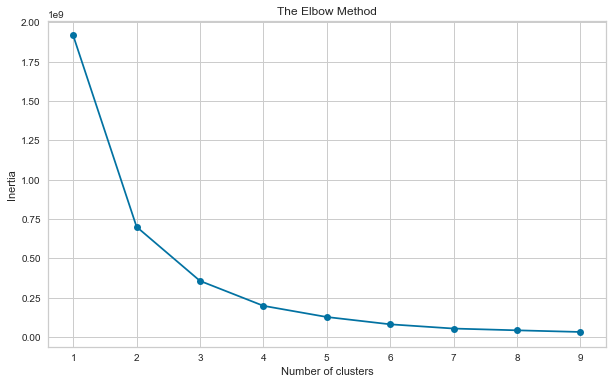

In [103]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_0)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [104]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_0 = kmeans.fit(pca_transformed_0)
# Getting unique labels
u_labels = np.unique(label_0)

In [105]:
df_0['km_cluster'] = kmeans.labels_
df_0.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
1,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
2,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67


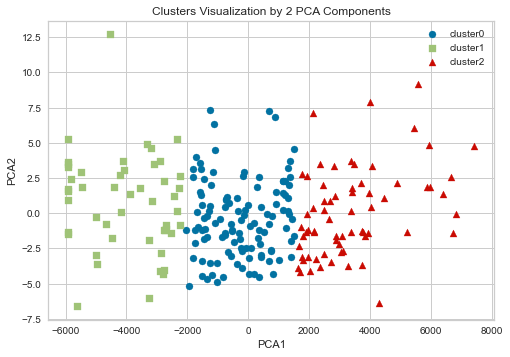

In [106]:
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_0['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_0[df_0['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_0.loc[markers[i], 'pca_x'], y = df_0.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [138]:
df_0[df_0['pca_y'] > 12.5]

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
393,송파구,삼전동,1171061000,30695,0.95,32311,2.407419,2.820752,4.050411,3.11047,4.570361,3.515465,12361.052632,0.0,0.0,0.719123,0.0,1.0,0.0,20.0,2.242947,5.263158,5.263158,-4545.721094,12.702071,1


In [140]:
df_0[df_0['km_cluster'] == 1].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
count,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,1.146603e+09,26110.897959,0.755918,35216.530612,2.831382,3.932413,3.764585,3.190432,3.694636,3.710230,11822.045005,0.243157,0.395401,0.528412,0.119462,2.571429,1.279725,8.018525,1.280767,4.833761,2.400456,-4006.710817,0.752018,1.0
std,1.780647e+07,9063.013285,0.275272,5908.527577,0.423924,0.554610,0.266055,0.261062,0.403261,0.501735,1330.000589,0.648408,0.427812,0.338992,0.253126,1.322876,1.402117,3.421699,0.558542,1.842286,1.156224,1330.000795,3.414308,0.0
min,1.111068e+09,9051.000000,0.260000,23928.000000,1.825294,2.633087,2.853232,2.723533,2.833213,2.233592,10054.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5907.598516,-6.605512,1.0
25%,1.132069e+09,18786.000000,0.620000,30895.000000,2.510978,3.593630,3.665980,3.032667,3.467358,3.494108,10596.969697,0.000000,0.000000,0.394129,0.000000,1.000000,0.000000,5.952381,0.991367,3.571429,1.818182,-5472.470670,-1.347201,1.0
50%,1.153056e+09,24918.000000,0.720000,35299.000000,2.890649,3.924352,3.823436,3.114085,3.696220,3.778025,11702.469136,0.000000,0.333333,0.514858,0.000000,3.000000,0.816993,8.474576,1.301525,4.687500,2.295918,-3887.135115,1.210745,1.0
75%,1.162060e+09,31314.000000,0.940000,40130.000000,3.193368,4.253552,3.944020,3.354663,3.873752,4.021091,13287.804878,0.000000,0.617284,0.735707,0.142045,4.000000,1.983471,10.113960,1.696614,5.718954,2.857143,-2781.634868,2.945525,1.0
max,1.171065e+09,52770.000000,1.550000,47116.000000,3.411887,4.971391,4.135323,4.068492,4.654557,4.581560,13722.931785,3.125000,2.500000,1.235188,1.282051,4.000000,6.285714,20.000000,2.242947,10.714286,5.303030,-2238.665942,12.702071,1.0


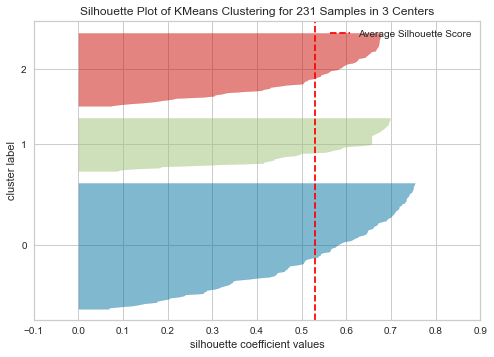

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 231 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [110]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_transformed_0)      
visualizer.show()

In [111]:
score = silhouette_score(data_0,df_0['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.531


#### 2.2.2 km_cluster == 1

- Elbow 관측

In [112]:
df_1 = df[df['km_cluster'] == 1][tmp_df.columns]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
15,종로구,숭인1동,1111070000,6106,0.23,26548,3.411887,4.399802,4.079746,3.501108,3.232693,4.225246,7308.695652,4.347826,0.000000,1.154965,0.000000,1.0,6.521739,10.869565,1.676690,8.695652,4.347826
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,4.581812,4.723985,2.770377,3.816491,1235.353535,3.030303,0.000000,2.979952,3.030303,1.0,1.010101,18.181818,1.393842,7.070707,0.000000
22,중구,광희동,1114059000,6340,0.74,8568,3.242909,4.820064,3.881564,4.337732,1.482832,3.308766,3525.675676,5.405405,1.351351,1.745668,0.000000,1.0,6.756757,1.351351,1.309063,7.432432,0.675676
24,중구,신당동,1114061500,9095,0.55,16536,3.411887,4.965807,4.150992,3.761200,3.195328,4.054679,6552.727273,1.818182,0.303030,1.597243,0.000000,1.0,0.000000,11.515152,1.230880,9.393939,2.727273
29,중구,동화동,1114066500,10433,0.26,40127,2.192942,4.971391,4.399816,4.032878,3.920449,4.542749,10430.769231,0.000000,0.641026,0.495321,0.000000,3.0,0.000000,12.820513,0.825075,8.333333,5.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,2.682371,4.842781,4.492848,3.817764,3.793958,3.676241,10816.901408,0.000000,2.816901,1.057073,0.469484,1.0,6.103286,6.572770,1.455444,7.981221,1.877934
419,강동구,천호3동,1174062000,27000,0.79,34177,1.995303,4.736901,4.387340,3.713469,3.689723,3.572322,12037.974684,0.000000,2.531646,0.988710,0.421941,1.0,5.485232,5.907173,1.374623,7.172996,1.687764
420,강동구,성내1동,1174064000,20045,0.58,34560,2.323627,4.532105,4.581812,3.959499,4.376335,3.600927,10234.482759,0.000000,1.149425,1.193574,0.000000,1.0,2.873563,17.241379,2.202320,11.494253,4.597701
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,4.447090,3.818204,4.234034,3.460905,12134.328358,0.000000,0.995025,1.095290,0.000000,1.0,2.487562,14.925373,2.075079,9.950249,3.980100


In [113]:
col_1 = df_1.columns[6:]
data_1 = df_1[col_1].values

In [114]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
15,종로구,숭인1동,1111070000,6106,0.23,26548,3.411887,4.399802,4.079746,3.501108,3.232693,4.225246,7308.695652,4.347826,0.000000,1.154965,0.000000,1.0,6.521739,10.869565,1.676690,8.695652,4.347826,2289.021813,-4.372599
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,4.581812,4.723985,2.770377,3.816491,1235.353535,3.030303,0.000000,2.979952,3.030303,1.0,1.010101,18.181818,1.393842,7.070707,0.000000,8362.365735,2.580443
22,중구,광희동,1114059000,6340,0.74,8568,3.242909,4.820064,3.881564,4.337732,1.482832,3.308766,3525.675676,5.405405,1.351351,1.745668,0.000000,1.0,6.756757,1.351351,1.309063,7.432432,0.675676,6072.042197,-14.263217
24,중구,신당동,1114061500,9095,0.55,16536,3.411887,4.965807,4.150992,3.761200,3.195328,4.054679,6552.727273,1.818182,0.303030,1.597243,0.000000,1.0,0.000000,11.515152,1.230880,9.393939,2.727273,3044.991024,-3.464761
29,중구,동화동,1114066500,10433,0.26,40127,2.192942,4.971391,4.399816,4.032878,3.920449,4.542749,10430.769231,0.000000,0.641026,0.495321,0.000000,3.0,0.000000,12.820513,0.825075,8.333333,5.769231,-833.051323,-2.144657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,2.682371,4.842781,4.492848,3.817764,3.793958,3.676241,10816.901408,0.000000,2.816901,1.057073,0.469484,1.0,6.103286,6.572770,1.455444,7.981221,1.877934,-1219.183907,-8.831829
419,강동구,천호3동,1174062000,27000,0.79,34177,1.995303,4.736901,4.387340,3.713469,3.689723,3.572322,12037.974684,0.000000,2.531646,0.988710,0.421941,1.0,5.485232,5.907173,1.374623,7.172996,1.687764,-2440.256796,-9.589568
420,강동구,성내1동,1174064000,20045,0.58,34560,2.323627,4.532105,4.581812,3.959499,4.376335,3.600927,10234.482759,0.000000,1.149425,1.193574,0.000000,1.0,2.873563,17.241379,2.202320,11.494253,4.597701,-636.765444,2.602361
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,4.447090,3.818204,4.234034,3.460905,12134.328358,0.000000,0.995025,1.095290,0.000000,1.0,2.487562,14.925373,2.075079,9.950249,3.980100,-2536.610517,0.055804


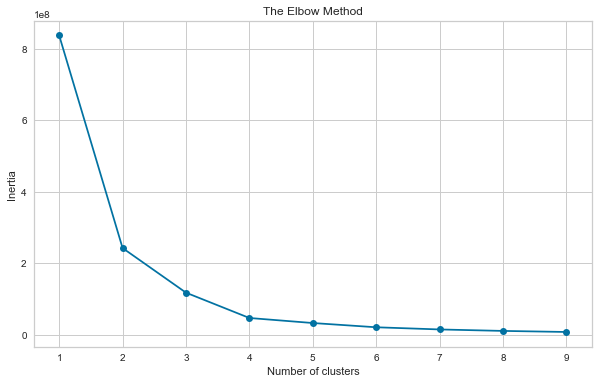

In [115]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 2(Elbow)로 설정

In [141]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [142]:
df_1['km_cluster'] = kmeans.labels_
df_1.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
1,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49


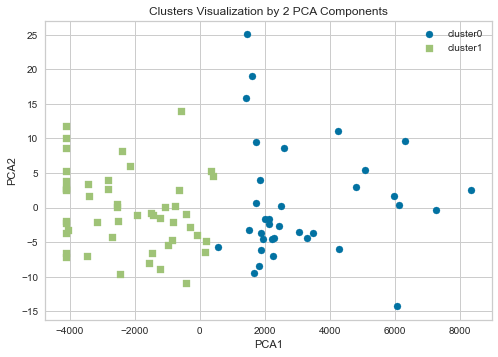

In [143]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1'])
plt.show()

In [144]:
df_1[df_1['pca_y'] > 20] # 편의시설, 교육이 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
369,강남구,역삼2동,1168065000,36378,1.15,31633,2.738875,4.971391,4.581812,4.779671,4.669978,3.501764,8150.434783,0.0,0.869565,2.43666,0.869565,1.0,4.782609,39.130435,3.376251,16.521739,6.521739,1447.28158,25.030803,0


In [146]:
df_1[df_1['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
count,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,1.149803e+09,22306.257143,1.074571,23282.314286,2.855785,4.227546,4.263526,3.707047,4.066182,3.609710,6451.257778,0.728878,0.827951,1.273913,0.521859,1.971429,2.374561,15.877431,2.109001,7.165372,3.617823,3146.460432,0.531859,0.0
std,1.929223e+07,10272.019285,0.580103,9304.131017,0.474947,0.612320,0.320487,0.423637,0.715200,0.850268,1937.000596,1.329078,0.709668,0.602611,0.556728,1.124218,2.126838,8.134390,0.618848,3.051852,1.476503,1937.000990,8.290343,0.0
min,1.111070e+09,3742.000000,0.230000,3780.000000,1.563501,3.049981,3.468460,3.005170,1.482832,1.963252,1235.353535,0.000000,0.000000,0.265399,0.000000,1.000000,0.000000,1.351351,0.683295,1.287554,0.000000,574.767226,-14.263217,0.0
25%,1.138066e+09,16495.500000,0.605000,15755.000000,2.706178,3.652692,4.029643,3.368467,3.852022,2.852431,5323.724490,0.000000,0.243426,0.818002,0.238095,1.000000,0.905051,10.894553,1.672508,5.534294,2.686388,1828.322973,-4.498777,0.0
50%,1.154551e+09,21083.000000,0.880000,24752.000000,2.856019,4.353107,4.305698,3.699740,4.274500,3.955703,7327.450980,0.000000,0.806452,1.193574,0.425532,1.000000,1.724138,13.930348,2.115633,7.070707,3.813559,2270.265910,-1.675669,0.0
75%,1.168052e+09,26736.000000,1.390000,30357.500000,3.267003,4.813560,4.581812,3.950426,4.591683,4.208492,7769.395475,1.431949,1.276619,1.632295,0.643166,3.000000,3.124187,18.751683,2.620487,8.514493,4.373913,4273.993989,3.459562,0.0
max,1.171072e+09,43181.000000,2.520000,42662.000000,3.411887,4.971391,4.581812,4.779671,4.669978,5.128153,9022.950820,5.405405,2.442529,2.979952,3.030303,4.000000,9.090909,39.130435,3.376251,16.521739,6.521739,8362.365735,25.030803,0.0


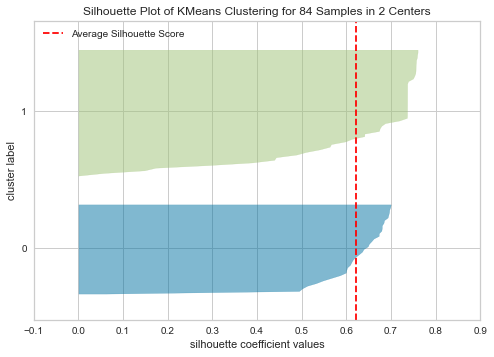

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 84 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [147]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [148]:
score = silhouette_score(data_1,df_1['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.621


#### 2.2.3 km_cluster == 2

- Elbow 관측

In [150]:
df_2 = df[df['km_cluster'] == 2][tmp_df.columns]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,1.680521,1.712617,1.901003,1.348966,1249.027237,0.0,0.000000,0.121954,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,1.704138,2.333641,0.696497,2.126152,459.060403,0.0,0.000000,0.513507,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,0.986868,1.767232,2.305664,1.163976,1138.766520,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.631834,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,0.923256,0.838238,1.167229,0.754899,518.263811,0.0,0.000000,0.106825,0.000000,4.0,0.000000,0.563698,0.447053,0.000000,0.000000
5,종로구,무악동,1111057000,8297,0.36,23047,2.668385,3.613916,2.700615,2.340737,3.804190,3.613916,5061.111111,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.329136,2.777778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,강동구,고덕1동,1174055000,24417,1.73,14114,2.205539,3.317439,2.638644,2.084487,3.235614,3.263639,2954.335260,0.0,0.289017,0.253880,0.000000,2.0,0.000000,1.734104,0.253880,0.578035,1.156069
413,강동구,고덕2동,1174056000,22329,2.01,11109,1.881324,3.173275,2.500130,1.954403,3.091947,3.119797,2992.537313,0.0,0.248756,0.222148,0.000000,2.0,0.000000,1.492537,0.222148,0.497512,0.995025
416,강동구,암사3동,1174059000,17947,2.51,7150,1.857501,2.940657,2.518531,2.000906,2.998385,1.863287,1699.203187,0.0,0.531208,0.124694,0.000000,3.0,0.132802,2.124834,0.723879,0.531208,0.664011
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,2.801382,2.630872,3.466245,0.000000,35.869565,0.0,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,1.449473,2.173913,1.630435


In [151]:
col_2 = df_2.columns[6:]
data_2 = df_2[col_2].values

In [152]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,1.680521,1.712617,1.901003,1.348966,1249.027237,0.0,0.000000,0.121954,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210,-2002.189906,-2.030873
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,1.704138,2.333641,0.696497,2.126152,459.060403,0.0,0.000000,0.513507,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000,-2792.156348,-0.107788
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,0.986868,1.767232,2.305664,1.163976,1138.766520,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.631834,2.202643,1.321586,-2112.450116,-0.609110
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,0.923256,0.838238,1.167229,0.754899,518.263811,0.0,0.000000,0.106825,0.000000,4.0,0.000000,0.563698,0.447053,0.000000,0.000000,-2732.954311,-2.381219
5,종로구,무악동,1111057000,8297,0.36,23047,2.668385,3.613916,2.700615,2.340737,3.804190,3.613916,5061.111111,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.329136,2.777778,0.000000,1809.895072,-1.808167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,강동구,고덕1동,1174055000,24417,1.73,14114,2.205539,3.317439,2.638644,2.084487,3.235614,3.263639,2954.335260,0.0,0.289017,0.253880,0.000000,2.0,0.000000,1.734104,0.253880,0.578035,1.156069,-296.881034,-0.462556
413,강동구,고덕2동,1174056000,22329,2.01,11109,1.881324,3.173275,2.500130,1.954403,3.091947,3.119797,2992.537313,0.0,0.248756,0.222148,0.000000,2.0,0.000000,1.492537,0.222148,0.497512,0.995025,-258.679220,-0.852504
416,강동구,암사3동,1174059000,17947,2.51,7150,1.857501,2.940657,2.518531,2.000906,2.998385,1.863287,1699.203187,0.0,0.531208,0.124694,0.000000,3.0,0.132802,2.124834,0.723879,0.531208,0.664011,-1552.013378,-0.063459
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,2.801382,2.630872,3.466245,0.000000,35.869565,0.0,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,1.449473,2.173913,1.630435,-3215.345677,3.447998


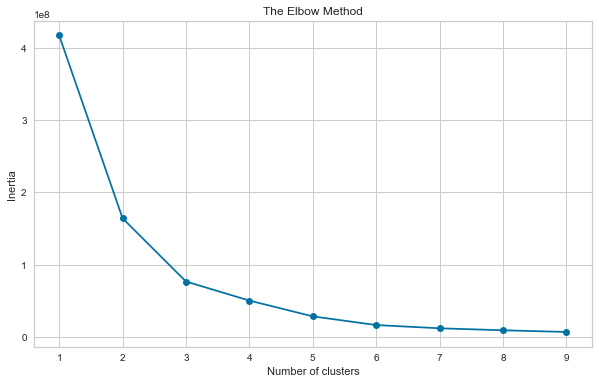

In [153]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 2(Elbow)로 설정

In [158]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# label
label_2 = kmeans.fit(pca_transformed_2)
# Getting unique labels
u_labels = np.unique(label_2)

In [159]:
df_2['km_cluster'] = kmeans.labels_
df_2.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
1,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35


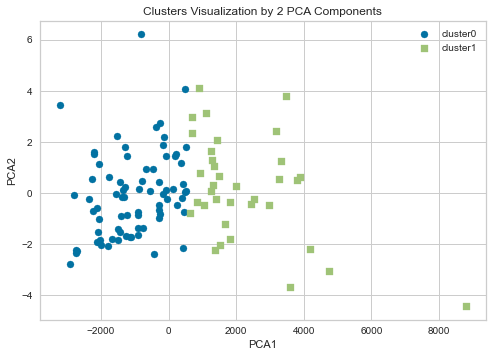

In [160]:
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_2['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_2[df_2['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_2.loc[markers[i], 'pca_x'], y = df_2.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3'])
plt.show()

In [161]:
df_2[df_2['pca_x'] > 8000] # 편의시설의 수가 적고, MZ 세대 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
114,성북구,돈암2동,1129059000,23913,0.48,49819,3.192703,2.965416,2.232848,1.381945,3.256894,2.19568,12045.833333,0.0,0.347222,0.298045,0.0,3.0,0.0,1.041667,1.006538,1.388889,0.347222,8794.615759,-4.446321,1


In [162]:
df_2[df_2['km_cluster'] == 1].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
count,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,1.141577e+09,22281.000000,1.316000,18770.485714,2.573258,3.187260,2.769454,2.324539,2.998597,2.591160,5477.020144,0.033223,0.085787,0.187927,0.072614,2.457143,0.271881,2.863757,0.851769,2.144710,1.109094,2225.804026,0.158341,1.0
std,1.938411e+07,9450.945711,0.664858,7417.190511,0.464556,0.632917,0.425549,0.442220,0.514863,0.750457,1621.514936,0.196548,0.187101,0.275083,0.166155,1.220965,0.406436,1.767680,0.418918,1.265935,0.734541,1621.514718,2.004166,0.0
min,1.111057e+09,8297.000000,0.360000,7680.000000,0.930052,1.451139,1.466337,1.366543,1.609438,0.000000,3896.601942,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,645.385556,-4.446321,1.0
25%,1.123818e+09,15124.500000,0.860000,14331.000000,2.481330,2.866286,2.615176,2.044778,2.691382,2.179753,4498.593738,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.362120,0.625620,1.374717,0.647799,1247.377823,-0.645056,1.0
50%,1.141062e+09,19917.000000,1.190000,17469.000000,2.593621,3.159933,2.744155,2.407946,3.126981,2.740840,4770.967742,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.690058,0.898661,1.920768,1.123596,1519.750705,0.247121,1.0
75%,1.156065e+09,26092.500000,1.670000,20956.500000,2.805494,3.592364,3.049249,2.578407,3.328585,2.987936,6463.477534,0.000000,0.131236,0.266289,0.030637,3.500000,0.571597,4.056945,1.079008,2.763889,1.425933,3212.261873,1.263431,1.0
max,1.174070e+09,49979.000000,3.050000,49819.000000,3.411887,4.307295,3.493439,3.320591,3.829206,3.877851,12045.833333,1.162791,0.966184,1.180389,0.751880,4.000000,1.818182,6.395349,1.834685,5.633803,2.816901,8794.615759,4.096500,1.0


In [163]:
df_2[df_2['pca_y'] > 6] # 동물병원 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
45,용산구,한남동,1117068500,22941,3.01,7622,2.442491,2.74842,2.41704,2.290217,1.794524,1.788987,2432.225914,0.996678,0.0,0.509496,0.0,3.0,0.664452,8.637874,0.691485,2.990033,1.66113,-818.989084,6.201994,0


In [164]:
df_2[df_2['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
count,7.600000e+01,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,1.143275e+09,22928.381579,3.491184,8418.250000,1.993286,2.748886,2.345720,2.002090,2.411972,2.265218,2226.175237,0.078430,0.169006,0.284114,0.058239,2.881579,0.296130,2.074012,0.608553,1.290437,0.716907,-1025.041328,-0.072920,0.0
std,2.085682e+07,10525.386074,2.751048,4236.579482,0.452113,0.788398,0.679984,0.505972,0.729291,0.816382,997.544369,0.431812,0.252773,0.292436,0.115636,1.243298,0.409645,1.492053,0.391092,1.009590,0.469544,997.544716,1.660705,0.0
min,1.111052e+09,144.000000,0.540000,157.000000,0.876522,0.743888,0.305382,0.711898,0.696497,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3215.345677,-2.800104,0.0
25%,1.126067e+09,16905.000000,1.722500,5074.000000,1.662283,2.141885,1.876077,1.733240,1.906800,1.751263,1468.108239,0.000000,0.000000,0.119689,0.000000,2.000000,0.000000,1.030616,0.314930,0.573302,0.351190,-1783.108714,-1.394464,0.0
50%,1.139567e+09,22236.500000,2.575000,7966.000000,1.932933,2.776402,2.480360,2.034900,2.436714,2.203673,2230.898218,0.000000,0.067539,0.198081,0.000000,3.000000,0.146273,1.895582,0.589220,1.120308,0.648461,-1020.319216,-0.169279,0.0
75%,1.165061e+09,28348.750000,3.272500,11873.500000,2.374030,3.225770,2.771605,2.274469,2.971892,2.946192,3023.269231,0.000000,0.259092,0.370440,0.072874,4.000000,0.394358,2.777299,0.868829,1.600970,0.998067,-227.946699,0.933561,0.0
max,1.174069e+09,56012.000000,12.680000,16945.000000,3.040091,4.495316,3.794365,3.534071,4.047042,4.321290,3761.111111,3.508772,1.379310,1.548350,0.606061,4.000000,1.851852,8.637874,1.449473,4.482759,1.754386,509.895575,6.201994,0.0


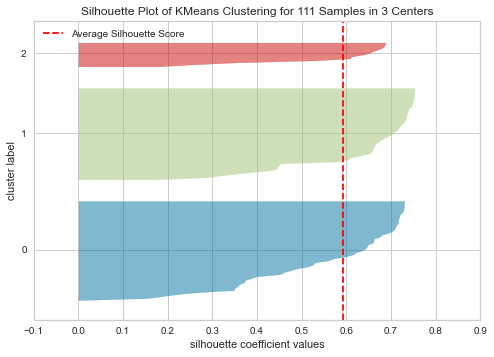

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 111 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [135]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_2)      
visualizer.show()

In [136]:
score = silhouette_score(data_2,df_2['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.592
